# 📩 Spam Mail Detection using TF-IDF & Logistic Regression

## 🔍 Project Overview
This project focuses on building a machine learning model to classify emails as **Spam** or **Ham (Not Spam)** using Natural Language Processing techniques.

We apply:
- Text preprocessing
- TF-IDF vectorization
- Logistic Regression classifier
- Model evaluation and feature importance analysis

The goal is to build a reliable spam detection system with high recall to minimize false negatives.

## 🎯 Problem Statement

Email spam detection is a classic Natural Language Processing (NLP) problem.  
The objective is to build a classification model that can accurately distinguish between spam and legitimate emails.

Key challenges:
- Text data needs preprocessing
- Handling imbalanced classes
- Reducing false negatives (important in spam detection)

This project aims to build a robust model while maintaining interpretability.

## 📊 Dataset Description

The dataset consists of labeled email messages classified as:
- 0 → Ham (Not Spam)
- 1 → Spam

Each row contains:
- Email text
- Target label

We will explore class distribution and analyze potential imbalance before training the model.



### Importing Dependencies

In [141]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

plt.style.use('seaborn-v0_8')
sns.set()

### Data Collection and Preprocessing

In [142]:
# loading the data frame from csv file to a pandas DataFrame
df = pd.read_csv('mail_data.csv')
# printing 5 rows of data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [143]:
# checking the number of rows and columns int the dataframe
df.shape

(5572, 2)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [145]:
round(df['Category'].value_counts(normalize = True)*100 , 2)

Category
ham     86.59
spam    13.41
Name: proportion, dtype: float64

In [146]:
# Label spam mail as 1
# Label ham mail as 0
df['Category'] = df['Category'].map({
    'ham' : 0 ,
    'spam':1
})


In [147]:
df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

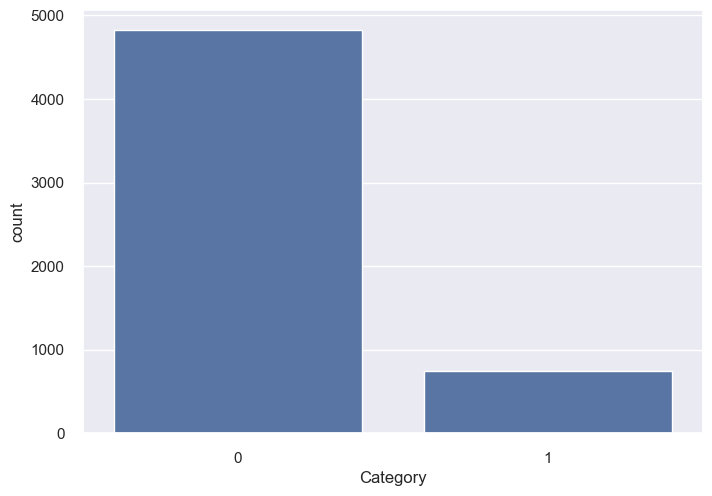

In [148]:
sns.countplot(x='Category', data=df)

In [149]:
# separating the data as y (target ) and X (feature)
X = df.drop(columns = 'Category' , axis = 1)
y = df['Category']

In [150]:
# splitting data into training and testing 
X_train , X_test , y_train , y_test = train_test_split (
    X , y , random_state = 42 , stratify = y , test_size = 0.2 
)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(4457, 1) (1115, 1) (4457,) (1115,)


### Feature Engineering (TF-IDF)

In [151]:
# transform the test data to feature vector that can be used input to the logistic regression 
vectorizer = TfidfVectorizer(
    min_df = 2,
    stop_words = 'english' ,
    max_df = 0.9,
    ngram_range = (1,2),
    lowercase = True)


In [152]:
X_train = vectorizer.fit_transform(X_train['Message']) 
X_test = vectorizer.transform(X_test['Message'])

In [153]:
print(X_train.shape)

(4457, 7351)


In [154]:
print(X_test.shape)

(1115, 7351)


### training the model(LogisticRegression)

In [155]:
# We trained a Logistic Regression classifier on TF-IDF features.
model = LogisticRegression(
    C = 0.5 , 
    class_weight = 'balanced' , 
    solver = 'liblinear', ## ⚖️ Handling Class Imbalance
    penalty = 'l2',
    max_iter = 1000
)

In [156]:
model.fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


### Model Evaluation

In [157]:
y_pred_train  = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [158]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))


Train Accuracy: 0.9905766210455463
Test Accuracy: 0.9739910313901345

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.89      0.92      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:

[[949  17]
 [ 12 137]]


### Feature Importance

In [159]:
feature_names = vectorizer.get_feature_names_out()


In [160]:
coefficients = model.coef_[0]


In [161]:
top_spam_indices = coefficients.argsort()[-20:][::-1]

for i in top_spam_indices:
    print(feature_names[i], coefficients[i])


txt 3.9164258175720055
free 3.259039444837788
mobile 3.1150251604294503
uk 3.093000592652855
claim 2.990145831685391
www 2.8817570214673016
reply 2.7311280450617756
stop 2.69126235718019
text 2.4922318552637654
service 2.4795262031134144
150p 2.41995282800519
prize 2.2301864062056405
com 2.2228381589805752
new 2.1497995742674925
50 2.132480783721142
won 2.0434537811302977
win 1.9194306295799444
cash 1.9184491418400973
urgent 1.885960740738253
chat 1.8028102587044301


In [162]:
top_ham_indices = coefficients.argsort()[:20]

for i in top_ham_indices:
    print(feature_names[i], coefficients[i])


ok -1.9302545016726163
ll -1.6770591050612862
da -1.462168586018656
come -1.440746472886533
got -1.4206526713416856
gt -1.3976749720460269
home -1.3971423767771116
lt -1.3793560007186236
lor -1.2764088235573208
sorry -1.2487185048196678
lt gt -1.1995231877917238
good -1.1972642817124346
hey -1.1490946084447173
later -1.1302541870588172
going -1.1156359577137223
way -1.0228142481499538
yeah -0.9645518176441166
like -0.915262932529041
oh -0.9056778104163934
wat -0.9046971403150634


In [163]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_spam_indices = np.argsort(coefficients)[-15:]
top_spam_words = feature_names[top_spam_indices]
top_spam_scores = coefficients[top_spam_indices]

top_ham_indices = np.argsort(coefficients)[:15]
top_ham_words = feature_names[top_ham_indices]
top_ham_scores = coefficients[top_ham_indices]


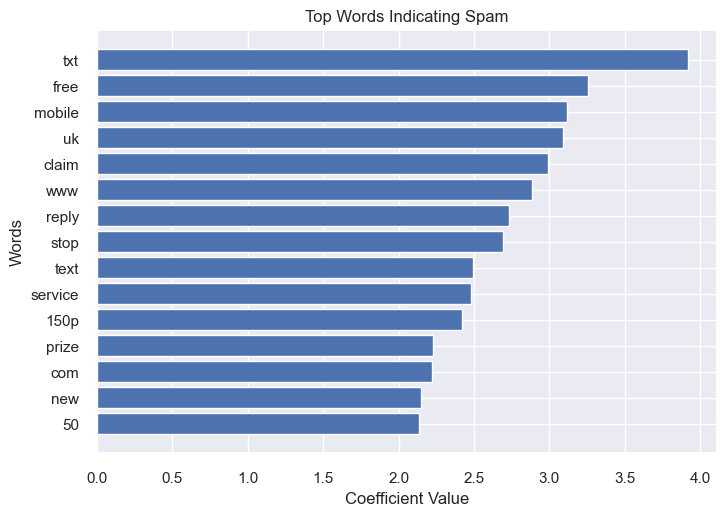

In [164]:
plt.figure()
plt.barh(top_spam_words, top_spam_scores)
plt.title("Top Words Indicating Spam")
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.show()


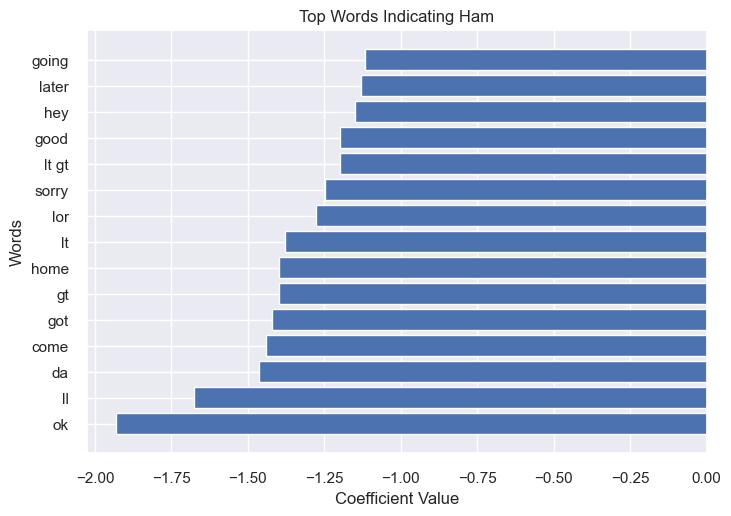

In [165]:
plt.figure()
plt.barh(top_ham_words, top_ham_scores)
plt.title("Top Words Indicating Ham")
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.show()


### Test on costom input

In [166]:
sample = ["Congratulations! You have won a free ticket"]
sample_vector = vectorizer.transform(sample)
prediction = model.predict(sample_vector)

print("Spam" if prediction[0] == 1 else "Ham")


Spam


### Save the model

In [167]:
import pickle

pickle.dump(model, open('spam_model.pkl','wb'))
pickle.dump(vectorizer, open('vectorizer.pkl','wb'))


## ✅ Conclusion

The Logistic Regression model achieved strong performance on spam detection using TF-IDF features.

Key takeaways:
- Text preprocessing significantly improves results
- TF-IDF is effective for email classification
- Logistic Regression provides both performance and interpretability

Future Improvements:
- Try advanced models (Naive Bayes, SVM, XGBoost)
- Use n-grams
- Experiment with deep learning models (LSTM, BERT)
